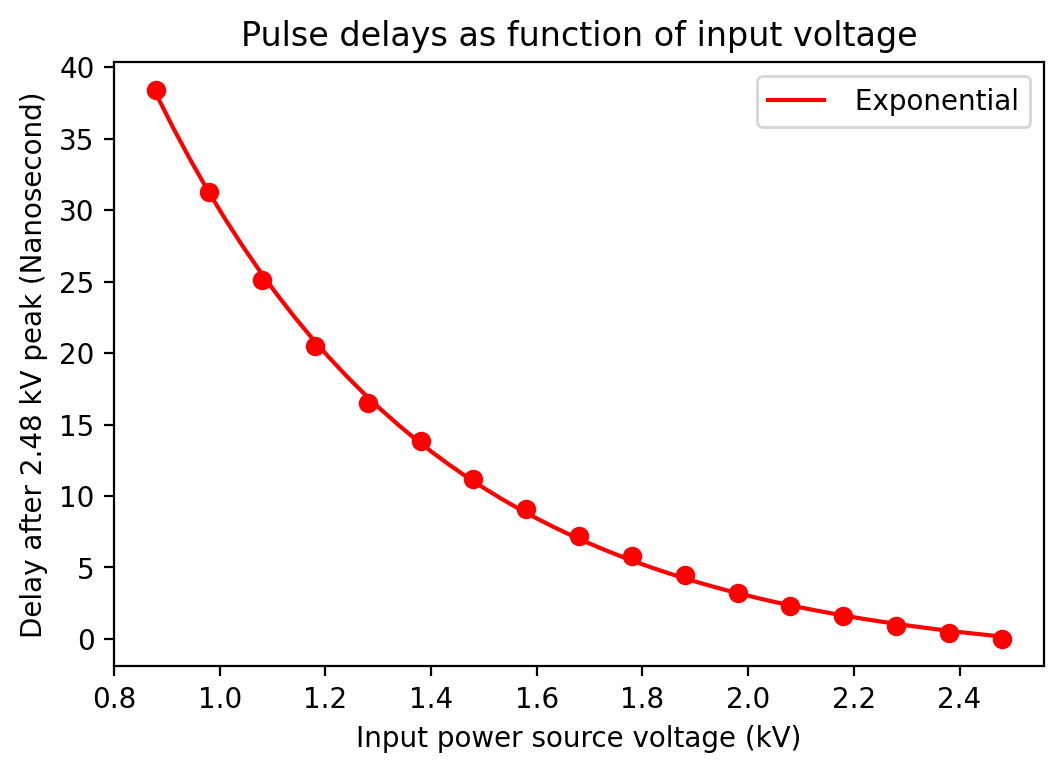

In [1]:
# Reset core 10V

import numpy
import os
import h5py
from matplotlib import pyplot
from scipy.optimize import curve_fit

figure, axis = pyplot.subplots(dpi = 200)

x_input = [2.48, 2.38, 2.28, 2.18, 2.08, 1.98, 1.88, 1.78, 1.68, 1.58, 1.48, 1.38, 1.28, 1.18, 1.08, 0.98, 0.88]
y_delay = [0, 0.45, 0.875, 1.575, 2.3, 3.25, 4.45, 5.8, 7.2, 9.1, 11.2, 13.85, 16.5, 20.5, 25.125, 31.25, 38.4]

axis.plot(x_input, y_delay, 'o', color = 'r')

# Fit to exponential.
def fit_exp(x, a, c, d):
    return a*numpy.exp(c*x)+d

# Fit to tanh.
def fit_tanh(x, a, b, c):
    return a * numpy.tanh(x * b) + c

def fit(func, initial_param, dashes, functype):
    popt, pcov = curve_fit(func, x_input, y_delay, p0 = initial_param)
    x_fit = numpy.linspace(0.88, 2.48)
    y_fit = func(numpy.asarray(x_fit), *popt)
    axis.plot(x_fit, y_fit, dashes, color = 'r', label = functype)

fit(fit_exp, (1, -0.01, 0), '-', ' 10V Reset Core') 

axis.set_title('Pulse delays as function of input voltage')
axis.set_xlabel('Input power source voltage (kV)')
axis.set_ylabel('Delay after 2.48 kV peak (Nanosecond)')
axis.legend()